In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib widget

In [2]:
def read_report(path):
    df = pd.read_csv(path)
    df['ts'] = df.apply(lambda x: pd.Timestamp(x['תאריך קריאה'] + " " + x['שעת קריאה']), axis=1)
    df.rename(columns={'צריכה': 'consumption'}, inplace=True)
    df.set_index('ts', inplace=True, drop=True)
    dropped_columns = df.columns.tolist(); dropped_columns.remove('consumption')
    df.drop(columns=dropped_columns, axis=1, inplace=True)
    return df

<AxesSubplot: xlabel='ts'>

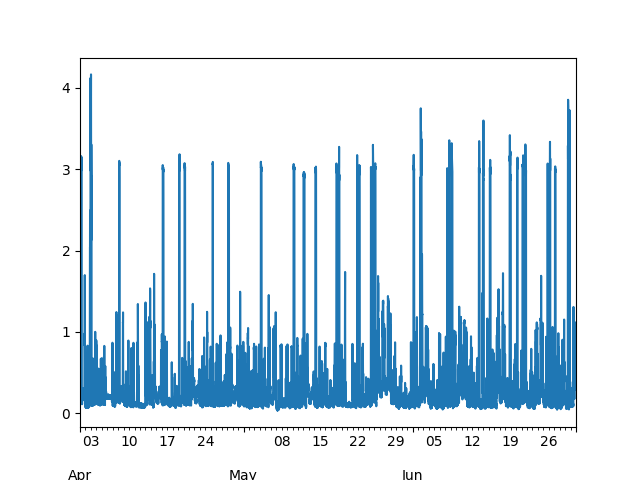

In [3]:
df = read_report('power.csv')
df['day_name'] = df.index.day_name()
df.consumption.plot()

In [7]:
default_rate = 0.6
provider_plans = [
    {"provider": "Pazgaz", "plans":
        [
        {'name': 'unlimited', 'discount': 0.05, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'weekend', 'discount': 0.1, 'periods':
                                                    [
                                                    {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Friday", "Saturday"]
                                                    ]
        },
        {'name': 'day', 'discount': 0.15, 'periods':  
                                                    [
                                                    {"day": day, "start":pd.Timestamp('08:00:00'), "end": pd.Timestamp('15:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                    ]
        },
        {'name': 'night', 'discount': 0.15, 'periods':
                                                    [
                                                    {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('06:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                    ] 
                                                    + 
                                                    [
                                                    {"day": day, "start":pd.Timestamp('23:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                    ]
        }
        ]
    },
    {"provider": "Cellcom", "plans":
        [
        {'name': 'Work From Home', 'discount': 0.15, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('08:00:00'), "end": pd.Timestamp('16:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]
                                                        ]
        },
        {'name': 'Night Saver', 'discount': 0.2, 'periods':
                                                    [
                                                    {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('06:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]
                                                    ] 
                                                    + 
                                                    [
                                                    {"day": day, "start":pd.Timestamp('22:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday"]
                                                    ]
        }
        ]
    },
    {"provider": "AmisraGas", "plans":
        [
        {'name': 'Default', 'discount': 0.065, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        }
        ]
    },
    {"provider": "Electra", "plans":
        [
        {'name': 'Power 1st year', 'discount': 0.05, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'Power 2nd year', 'discount': 0.06, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'Power 3rd year', 'discount': 0.07, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'HighTech 1st year', 'discount': 0.08, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('16:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
                                                        + 
                                                        [
                                                        {"day": day, "start":pd.Timestamp('23:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'HighTech 2nd year', 'discount': 0.09, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('16:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
                                                        + 
                                                        [
                                                        {"day": day, "start":pd.Timestamp('23:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },
        {'name': 'HighTech 3rd year', 'discount': 0.10, 'periods':  
                                                        [
                                                        {"day": day, "start":pd.Timestamp('00:00:00'), "end": pd.Timestamp('16:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
                                                        + 
                                                        [
                                                        {"day": day, "start":pd.Timestamp('23:00:00'), "end": pd.Timestamp('23:59:59')} for day in ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
                                                        ]
        },

        ]
    },
]

In [8]:
total_consumption = df.consumption.sum()
print("Total consumption: %d KW"%(total_consumption))
print('Cost: %.2f NIS' %(total_consumption * default_rate))

Total consumption: 3508 KW
Cost: 2105.04 NIS


In [11]:
def apply_plan_discount(df, plan):
    total_consumption = df.consumption.sum()
    discunted_consumption = 0
    for period in plan['periods']:
        discunted_consumption += df[df.day_name == period['day']].between_time(period['start'].time(), period['end'].time()).consumption.sum()
    
    discount = discunted_consumption * plan['discount'] * default_rate
    print(f"Plan: {plan['name']}")
    # print("Discunted consumption: %d KW" %(discunted_consumption))
    print("Saving: %.2f NIS" % (discount))
    print("")
    return discount

In [12]:
discounts = []
for provider in provider_plans:
    print(provider['provider'])
    for plan in provider['plans']:
        d = apply_plan_discount(df, plan)
        discounts.append({"provider": provider['provider'], "plan": plan['name'], "discount": d})

Pazgaz
Plan: unlimited
Saving: 105.25 NIS

Plan: weekend
Saving: 66.91 NIS

Plan: day
Saving: 83.66 NIS

Plan: night
Saving: 122.61 NIS

Cellcom
Plan: Work From Home
Saving: 52.17 NIS

Plan: Night Saver
Saving: 138.95 NIS

AmisraGas
Plan: Default
Saving: 136.83 NIS

Electra
Plan: Power 1st year
Saving: 105.25 NIS

Plan: Power 2nd year
Saving: 126.30 NIS

Plan: Power 3rd year
Saving: 147.35 NIS

Plan: HighTech 1st year
Saving: 123.04 NIS

Plan: HighTech 2nd year
Saving: 138.42 NIS

Plan: HighTech 3rd year
Saving: 153.80 NIS



In [16]:
pd.DataFrame(discounts).sort_values(by='discount', ascending=False).reset_index(drop=True)

,provider,plan,discount
0,Electra,HighTech 3rd year,153.800040
1,Electra,Power 3rd year,147.352464
2,Cellcom,Night Saver,138.952680
3,Electra,HighTech 2nd year,138.420036
4,AmisraGas,Default,136.827288
5,Electra,Power 2nd year,126.302112
6,Electra,HighTech 1st year,123.040032
7,Pazgaz,night,122.611590
8,Pazgaz,unlimited,105.251760
9,Electra,Power 1st year,105.251760
